# Statistics about the Full JSTOR Corpus

In [202]:
import json
from collections import Counter
import pandas as pd
from nltk.corpus import names
%matplotlib inline

In [67]:
# Load the data. 
with open('txt/middlemarch.json') as f: 
    mm = f.readlines()

In [76]:
# How many articles are there? 
len(mm)

6069

In [78]:
# Parse the data. 
data = [json.loads(line) for line in mm]

In [101]:
# What kind of metadata is there for each article? 
set([key for key in article.keys() for article in data])

{'author',
 'coverdate',
 'disc_name',
 'doi',
 'id',
 'jcode',
 'la',
 'no',
 'ocr',
 'pages',
 'publisher_name',
 'sp',
 'srcHtml',
 'title',
 'topics',
 'ty',
 'vo',
 'year'}

In [118]:
# What are those abbreviated fields? 

for field in ['la', 'no', 'sp', 'ty', 'vo']: 
    print(data[0][field])

['eng']
['1']
69
fla
['39']


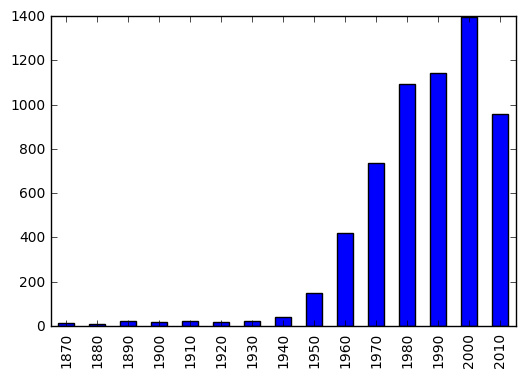

In [60]:
# What years are represented by these articles? 
years = [item['year'] for item in data]

# And what decades? 
decades = [(year - (year % 10)) for year in years]

# Plot the articles by decade. 
pd.Series(Counter(decades)).plot(kind='bar')

In [134]:
# What languages are represented? 

languages = [article['la'] for article in data if 'la' in article]
languages = [item[0] for item in languages] # Flatten
Counter(languages)

Counter({'EN': 2,
         'ara': 2,
         'cze': 1,
         'en': 263,
         'eng': 5747,
         'fre': 17,
         'ger': 15,
         'gle': 1,
         'heb': 2,
         'ita': 6,
         'por': 1,
         'spa': 10,
         'wel': 2})

In [102]:
# What are the most common journals represented here? 
journals = [article['journal'] for article in data if 'journal' in article]
Counter(journals).most_common(20)

[('Victorian Studies', 424),
 ('George Eliot - George Henry Lewes Studies', 206),
 ('Nineteenth-Century Fiction', 192),
 ('The Modern Language Review', 188),
 ('The Review of English Studies', 185),
 ('NOVEL: A Forum on Fiction', 126),
 ('Nineteenth-Century Literature', 126),
 ('Studies in the Novel', 120),
 ('Studies in English Literature, 1500-1900', 85),
 ('ELH', 77),
 ('Style', 76),
 ('Modern Philology', 71),
 ('College English', 50),
 ('The George Eliot, George Henry Lewes Newsletter', 47),
 ('The Yearbook of English Studies', 46),
 ('Victorian Periodicals Review', 45),
 ('The Sewanee Review', 45),
 ('The Hudson Review', 43),
 ('The Cambridge Quarterly', 33),
 ('Critical Inquiry', 30)]

In [103]:
# What are the top journals per decade? 

# First, make a dictionary of articles by decade. 
articlesByDecade = {decade: [] for decade in set(decades)}
for article in data: 
    thisDecade = (article['year']//10)*10 
    articlesByDecade[thisDecade].append(article)

In [109]:
# Next, make a dictionary of journal names by decade. 
journalsByDecade = {decade: [] for decade in set(decades)}
for decade, articles in articlesByDecade.items(): 
    for article in articles: 
        if 'journal' in article: 
            journalsByDecade[decade].append(article['journal'])
journalsByDecadeStats = {decade: Counter(journals).most_common(5) for decade, journals in journalsByDecade.items()}

In [110]:
journalsByDecadeStats

{1870: [('Bristol Selected Pamphlets', 1),
  ('Jahrbücher für Nationalökonomie und Statistik / Journal of Economics and Statistics',
   1)],
 1880: [('Bristol Selected Pamphlets', 3),
  ('Mind', 2),
  ('The Journal of the Royal Asiatic Society of Great Britain and Ireland',
   1)],
 1890: [('The School Review', 2),
  ('Foreign and Commonwealth Office Collection', 1),
  ('LSE Selected Pamphlets', 1),
  ('International Journal of Ethics', 1),
  ('Modern Art', 1)],
 1900: [('The Sewanee Review', 1),
  ('International Journal of Ethics', 1),
  ('Brush and Pencil', 1)],
 1910: [('The Sewanee Review', 3),
  ('Proceedings of the Aristotelian Society', 2),
  ('The Pennsylvania Magazine of History and Biography', 1),
  ('International Journal of Ethics', 1),
  ('American Journal of Sociology', 1)],
 1920: [('The Review of English Studies', 1),
  ('The Modern Language Review', 1),
  ('The Sewanee Review', 1),
  ('Modern Philology', 1),
  ('Texas Review', 1)],
 1930: [('Studies in Philology', 2),

In [35]:
# Extract topics. 
topics = [item['topics'] for item in data if 'topics' in item]

In [36]:
# How many articles are there that have assigned topics? 
len(topics)

5723

In [50]:
# How many total topics are there? 
allTopics = [item for sublist in topics for item in sublist] # Flatten list. 
countedTopics = Counter(allTopics)
len(countedTopics)

14228

In [72]:
# What are the top topics, and how often do they appear? 
countedTopics.most_common(20)

[('Novelists', 1337),
 ('Novels', 874),
 ('Pity', 672),
 ('Sympathy', 656),
 ('Irony', 642),
 ('Literary criticism', 510),
 ('Poetry', 468),
 ('Music criticism', 453),
 ('Women', 424),
 ('Anthologies', 406),
 ('Narratology', 403),
 ('Bibliographies', 391),
 ('Biographers', 390),
 ('Satire', 380),
 ('Idealism', 378),
 ('Love', 369),
 ('Vocation', 361),
 ('Biography', 353),
 ('Fear', 349),
 ('Humor', 346)]

In [82]:
# What about the top topics per decade? 

# Make a dictionary of topics by decade. 
topicsByDecade = {decade: [] for decade in set(decades)} 
for decade, articles in articlesByDecade.items(): 
    for article in articles: 
        if 'topics' in article: 
            for topic in article['topics']: 
                topicsByDecade[decade].append(topic)

In [94]:
# Get stats about the topics in each decade. 
topicsByDecadeStats = {decade: Counter(topics).most_common(10) for decade, topics in topicsByDecade.items()} 

In [111]:
topicsByDecadeStats

{1870: [('Pity', 5),
  ('Perfection', 4),
  ('Satire', 4),
  ('Humor', 3),
  ('Poetry', 3),
  ('Idealism', 3),
  ('Tears', 3),
  ('Volition', 3),
  ('Disgust', 3),
  ('Denouement', 3)],
 1880: [('Courage', 4),
  ('Pity', 3),
  ('Novelists', 3),
  ('Humanity', 3),
  ('Fear', 2),
  ('Deities', 2),
  ('Perfection', 2),
  ('Beauty', 2),
  ('Spiritual love', 2),
  ('Fables', 2)],
 1890: [('Novelists', 6),
  ('Vocation', 3),
  ('Insanity defenses', 3),
  ('Sadness', 3),
  ('Herniorrhaphy', 2),
  ('Injustice', 2),
  ('Heirs', 2),
  ('Priests', 2),
  ('Bicycles', 2),
  ('Financiers', 2)],
 1900: [('Humor', 5),
  ('Love', 3),
  ('Health professions', 3),
  ('Courage', 3),
  ('Novelists', 3),
  ('Surgeons', 3),
  ('Road shoulders', 2),
  ('Financiers', 2),
  ('Heroes', 2),
  ('Rapture', 2)],
 1910: [('Pity', 6),
  ('Novelists', 6),
  ('Humor', 5),
  ('Pathos', 5),
  ('Biographers', 4),
  ('Envy', 4),
  ('Sweetness', 3),
  ('Sadness', 3),
  ('Cynicism', 3),
  ('Humorists', 3)],
 1920: [('Novelist

In [148]:
# What are these underwater photography articles?!
underwaterPhotographyArticles = [article for article in data if 'topics' in article and 'Underwater photography' in article['topics']]
for article in underwaterPhotographyArticles: 
    print('Article %s' % article['id'])
    for key in ['title', 'journal', 'year']: 
            if key in article: 
                print('\t%s: %s' % (key, article[key]))
            else: 
                print('\t%s: ???' % (key))

Article e74da730-0474-37d5-a8bb-8c2fdd073bfe
	title: ???
	journal: ???
	year: 1937
Article 495c2689-66be-33da-9c09-254f6962bd22
	title: ???
	journal: ???
	year: 1937
Article a079e6e7-6f21-3284-9a0b-e05d860855ba
	title: ???
	journal: ???
	year: 1937
Article 416ddbbd-a6be-3df9-a3de-acaa2f97dd25
	title: ???
	journal: ???
	year: 1937
Article f8231693-237d-352f-b5b6-e00cbc426290
	title: ['Some Sources for the History of the School Manager, 1800-1902']
	journal: British Journal of Educational Studies
	year: 1973
Article 73aa7323-adc9-360a-8dae-7b26402b2903
	title: ['Health Policies, Health Politics', 'The British and American Experience, 1911-1965', 'NOTE ON SOURCES']
	journal: ???
	year: 1986


In [177]:
# Make a list of authors. 
authors = [article['author'] for article in data if 'author' in article]

In [178]:
authors = [item for sublist in authors for item in sublist]

In [180]:
# Who are the rockstar Eliot scholars? 
Counter(authors).most_common(10)

[('U. C. Knoepflmacher', 26),
 ('DONALD HAWES', 24),
 ('George Levine', 24),
 ('J. Hillis Miller', 20),
 ('JEROME MECKIER', 16),
 ('Rosemary Ashton', 15),
 ('Edward H. Cohen', 15),
 ('Daniel Cottom', 15),
 ('FELICIA BONAPARTE', 14),
 ('G. B. Tennyson', 14)]

In [182]:
uniqueAuthors = set(authors)

In [183]:
# This is a bit iffy, but we might be able to guess the gender of authors by looking at their first names. 
maleNames = names.words('male.txt')
femaleNames = names.words('female.txt')

# Lowercase the names so we can look them up easier. 
maleNames = [name.lower() for name in maleNames]
femaleNames = [name.lower() for name in femaleNames]

In [190]:
genderCategories = ['Male', 'Female', 'Ambiguous', 'Unknown']
genderGuesses = {category: 0 for category in genderCategories}
genderGuessedNames = {category: [] for category in genderCategories}

for author in uniqueAuthors: 
    firstName = author.split(' ')[0].lower()
    if firstName in maleNames and firstName in femaleNames: 
        genderGuesses['Ambiguous'] += 1
        genderGuessedNames['Ambiguous'].append(firstName)
    elif firstName in maleNames: 
        genderGuesses['Male'] += 1 
        genderGuessedNames['Male'].append(firstName)
    elif firstName in femaleNames: 
        genderGuesses['Female'] += 1
        genderGuessedNames['Female'].append(firstName)
    else: 
        genderGuesses['Unknown'] += 1   
        genderGuessedNames['Unknown'].append(firstName)

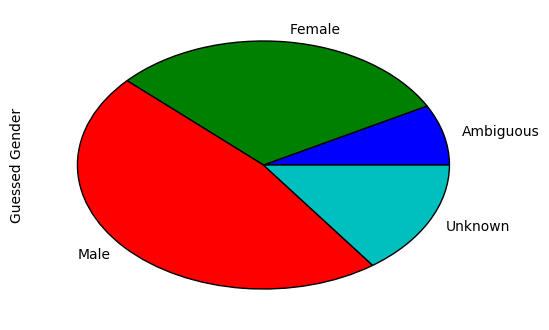

In [195]:
pd.Series(genderGuesses).plot(kind='pie', label="Guessed Gender")

In [200]:
# Are there any articles with the exact same title (possible duplicates)? 
titles = [article['title'] for article in data if 'title' in article]
titles = [item for sublist in titles for item in sublist] # Flatten

In [201]:
Counter(titles).most_common(20)

[('Front Matter', 212),
 ('Back Matter', 209),
 ('Index', 166),
 ('Volume Information', 125),
 ('Notes', 89),
 ('INDEX', 70),
 ('Bibliography', 47),
 ('Summary of Periodical Literature', 42),
 ('NOTES', 31),
 ('Recent Studies in the Nineteenth Century', 30),
 ('Introduction', 27),
 ('Works Cited', 26),
 ('Table of Contents', 21),
 ('Books Received', 19),
 ('List of Publications Received', 17),
 ('The Making of Nineteenth-Century English Fiction', 14),
 ('The Poetics of Poesis', 14),
 ('Recent Books', 13),
 ('Abstracts', 13),
 ('Social Figures', 12)]